# Feature Scaling in Machine Learning

Feature Scaling is used to normalize the data features of our dataset, so that all features are brought to a common scale. This is a very important data pre-processing step before building any Machine Learning model, otherwise, the resulting model will produce underwhelming results.

For example, suppose you have several independent features like `Age`, `Employee Salary`, `Height (in feet)`

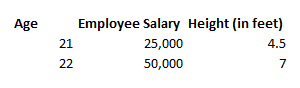

In the above example, each feature has its own range and when these numbers are fed into the Model during the training process, the model will not understand the `skewness` in the data range. This is because it does not understand years, salary, height all it will see are numbers varying across a big range and all this will result in a bad model.

#### Skewness
Skewness is a measure of the asymmetry of a distribution. A distribution is asymmetrical when its left and right side are not mirror images. A distribution can have right (or positive), left (or negative), or zero skewness.

#### Feature Scaling
will help to bring these vastly different ranges of values within the same range. For example, values of years, salary, height can be normalized in the range from (0,1) and thus giving a more quality input to the ML model.



### Feature Scaling Techniques

- Standardization

- Min-Max Normalization

- MaxAbs Scaler

- Robust Scaler

#### Standardization

Scales the Independent variables so that it has a distribution with `0` `Mean` value and `variance` equals `1`. Standard Scaler is not a good option if our Data Points aren't normally distributed (Not following Gaussian Distribution)

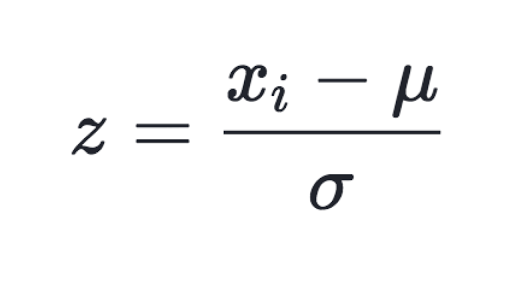

µ -> Mean

σ -> Standard Deviation

In `sklearn` library, the standard scaling is applied using `StandardScaler()` function of `sklearn.preprocessing` module

#### Min-Max Normalization

In Min-Max Normalization, for any given feature, the minimum value of that feature gets transformed to `0`, while the maximum value will transform to `1`, and all other values are normalized between `0` and `1`. The biggest drawback of Min-Max Normalization is, it is sensitive to outliers

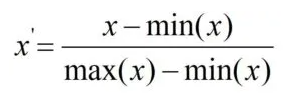

`min(x)` -> Minimum value of `x`

`max(x)` -> Maximum value of `x`

In `sklearn` library, the standard scaling is applied using `MinMaxScaler()` function of `sklearn.preprocessing` module

#### MaxAbs Scaler

In MaxAbs-Scaler each feature is scaled by using its maximum value. At first, the absolute maximum value of the feature is found, and then the features are divided with it. The biggest drawback of MaxAbs Scaler is, it is sensitive to outliers.

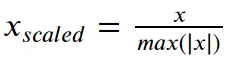

`max(|x|)` ->  Absolute maximum value of `x`

In `sklearn` library, the standard scaling is applied using `MaxAbsScaler()` function of `sklearn.preprocessing` module

#### Robust Scaler

Robust Scaler is calculated by using the interquartile range (IQR), here IQR is the range between the 1st Quartile (25th quantile) and the 3rd Quartile (75th quantile). It can handle outlier data points as well.

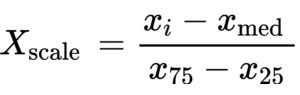

`x_med` -> Median of the feature `x`

`x_75`  -> 3rd Quartile

`x_25`  -> 1st Quartile

In `sklearn` library, the standard scaling is applied using `RobustScaler()` function of `sklearn.preprocessing` module

### SkLearn Feature Scaling examples

Lets do `regression` on the housing Dataset, and first, see results without feature scaling and then compare the results by applying feature Scaling

In [1]:
import pandas as pd
import numpy as np
from sklearn.preprocessing import StandardScaler,MinMaxScaler,MaxAbsScaler,RobustScaler
from sklearn.model_selection import train_test_split
from sklearn.neighbors import KNeighborsRegressor
from sklearn.metrics import accuracy_score
from sklearn import preprocessing

In [2]:
dataset_path = "DataSet/housing.csv"

In [3]:
df = pd.read_csv(dataset_path)
df.head()

,longitude,latitude,housing_median_age,total_rooms,total_bedrooms,population,households,median_income,median_house_value,ocean_proximity
0,-122.23,37.88,41.0,880.0,129.0,322.0,126.0,8.3252,452600.0,NEAR BAY
1,-122.22,37.86,21.0,7099.0,1106.0,2401.0,1138.0,8.3014,358500.0,NEAR BAY
2,-122.24,37.85,52.0,1467.0,190.0,496.0,177.0,7.2574,352100.0,NEAR BAY
3,-122.25,37.85,52.0,1274.0,235.0,558.0,219.0,5.6431,341300.0,NEAR BAY
4,-122.25,37.85,52.0,1627.0,280.0,565.0,259.0,3.8462,342200.0,NEAR BAY


In [4]:
df.shape

(20640, 10)

The dataset contains various features like - `longitude`, `latitude`, `housing_median_age`, `total_rooms`, `population`, `households`, `median_income`, `median_house_value`. 

The problem statement is to predict the house value given other independent feature variables in the dataset. It contains 20640 Rows (Records) and 10 Columns (features)

It is also observed that we have a Categorical Feature - `ocean_proximity`. Lets drop it.

In [5]:
df.drop(['ocean_proximity'],axis=1,inplace=True)
df.head()

,longitude,latitude,housing_median_age,total_rooms,total_bedrooms,population,households,median_income,median_house_value
0,-122.23,37.88,41.0,880.0,129.0,322.0,126.0,8.3252,452600.0
1,-122.22,37.86,21.0,7099.0,1106.0,2401.0,1138.0,8.3014,358500.0
2,-122.24,37.85,52.0,1467.0,190.0,496.0,177.0,7.2574,352100.0
3,-122.25,37.85,52.0,1274.0,235.0,558.0,219.0,5.6431,341300.0
4,-122.25,37.85,52.0,1627.0,280.0,565.0,259.0,3.8462,342200.0


#### Drop all rows that has NaN/None values

In [6]:
df = df.dropna()
df.shape

(20433, 9)

After dropping the NaN/None value rows, the Size of the dataset is reduced to 20433

### Regression without Feature Scaling

Regression Model with KNN without applying `feature scaling`.

In [7]:
X = df.iloc[:,:-1]
y = df.iloc[:,[7]]
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.33, random_state=0) #Split the Train, Test record

In [8]:
#Creating Regression Model
clf = KNeighborsRegressor()
clf.fit(X_train, y_train)

KNeighborsRegressor()

In [9]:
#Accuracy on Testing data
clf.predict(X_test)
score=clf.score(X_test,y_test)
print("Accuracy on testing dataset without Feature scaling is : {:.3f}%".format(score*100))

Accuracy on testing dataset without Feature scaling is : 54.943%


The Model performance is not good without `feature scaling`, and the accuracy is `54.943%`

### SkLearn Standard Scaler

In [10]:
# Train Test Split
X=df.iloc[:,:-1]
y=df.iloc[:,[7]]
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.33, random_state=0)

In [11]:
#Creating StandardScaler Object
scaler = preprocessing.StandardScaler()

X_train = scaler.fit_transform(X_train)
X_test = scaler.transform(X_test)

In [12]:
#Creating regression model
model = KNeighborsRegressor()
model.fit(X_train,y_train)

KNeighborsRegressor()

In [13]:
#Accuracy on Testing Data
y_test_hat = model.predict(X_test)
score = model.score(X_test,y_test)
print("Accuracy of testing dataset using Standard Scaler is : {:.3f}%".format(score*100))

Accuracy of testing dataset using Standard Scaler is : 98.412%


### SkLearn MinMax Scaler

In [14]:
#Split Train and Test Dataset
X = df.iloc[:,:-1]
y = df.iloc[:,[7]]
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.33, random_state=0)

In [15]:
#Creating MinMax Scaler Object
mm = preprocessing.MinMaxScaler()

In [16]:
X_train = mm.fit_transform(X_train)
X_test = mm.transform(X_test)

In [17]:
# Creating Regression Model
model=KNeighborsRegressor() 
model.fit(X_train,y_train)

KNeighborsRegressor()

In [18]:
# Accuracy on Tesing Data
y_test_hat=model.predict(X_test) 
score=model.score(X_test,y_test)
print("Accuracy of testing dataset using MinMax Scaler is : {:.3f}%".format(score*100))

Accuracy of testing dataset using MinMax Scaler is : 98.558%


### SkLearn MaxAbsScaler

In [19]:
# Train Test Split
X = df.iloc[:,:-1]
y = df.iloc[:,[7]]
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.33, random_state=0)

In [20]:
#Creating MaxAbsScaler Object
mab=MaxAbsScaler()

In [21]:
X_train = mab.fit_transform(X_train)
X_test = mab.transform(X_test)

In [22]:
# Creating Regression Model
model=KNeighborsRegressor() 
model.fit(X_train,y_train)

KNeighborsRegressor()

In [23]:
# Accuracy on Tesing Data
y_test_hat = model.predict(X_test) 
score = model.score(X_test,y_test)
print("Accuracy of testing dataset using MinMax Scaler is : {:.3f}%".format(score*100))

Accuracy of testing dataset using MinMax Scaler is : 99.382%


### SkLearn Robust Scaler

In [24]:
# Train Test Split
X = df.iloc[:,:-1]
y = df.iloc[:,[7]]
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.33, random_state=0)

In [25]:
#Creating RobustScaler Object
rob = RobustScaler()

In [26]:
X_train = rob.fit_transform(X_train)
X_test = rob.transform(X_test)

In [27]:
# Creating Regression Model
model = KNeighborsRegressor() 
model.fit(X_train,y_train)

KNeighborsRegressor()

In [28]:
# Accuracy on Tesing Data
y_test_hat=model.predict(X_test) 
score=model.score(X_test,y_test)
print("Accuracy of testing dataset using Robust Scaler is : {:.3f}%".format(score*100))

Accuracy of testing dataset using Robust Scaler is : 98.295%


# Result

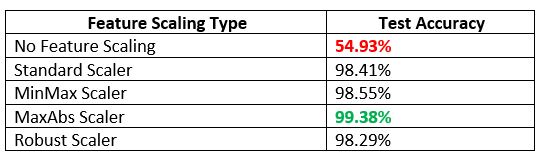